# Credit card fraud dataset


In [1]:
#Importing Required Libraries
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm



In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Credit_card_fraud.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = df.drop("Time", axis=1)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [5]:
#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:

df.isnull().values.any()

False

In [8]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]


In [9]:
print(fraud.shape,normal.shape)

(492, 30) (284315, 30)


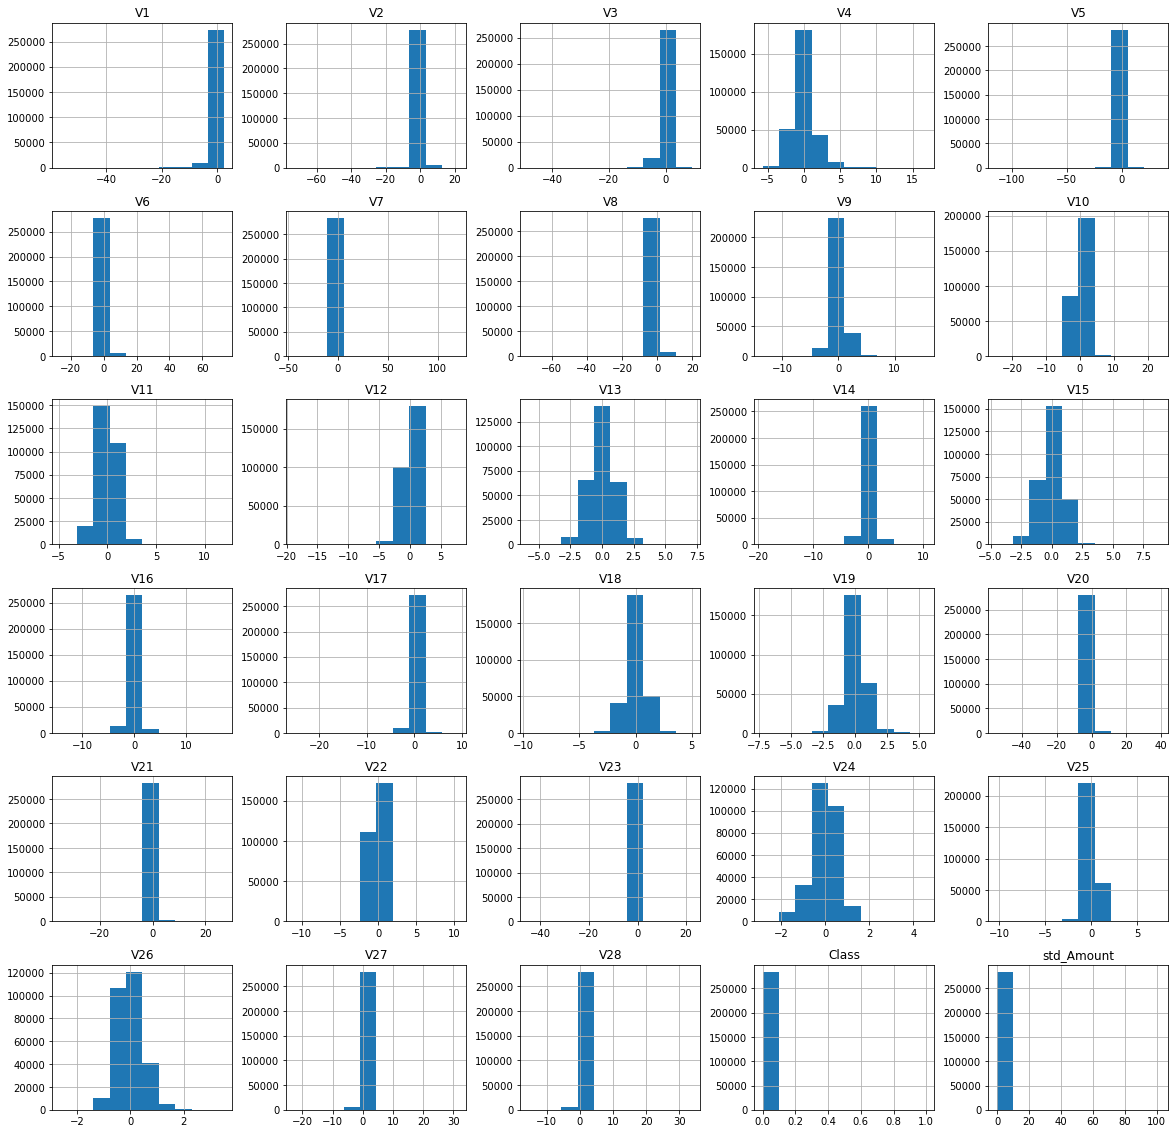

In [10]:
df.hist(figsize= (20,20))
plt.show()

Text(0, 0.5, 'Frequency')

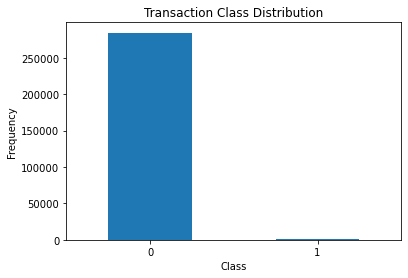

In [11]:

count_classes = pd.value_counts(df['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [12]:

#### Independent and Dependent Features
X=df.drop("Class",axis=1)
y=df.Class

In [13]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [14]:

#undersample
X_under, Y_under = undersample.fit_resample(X, y)

In [15]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

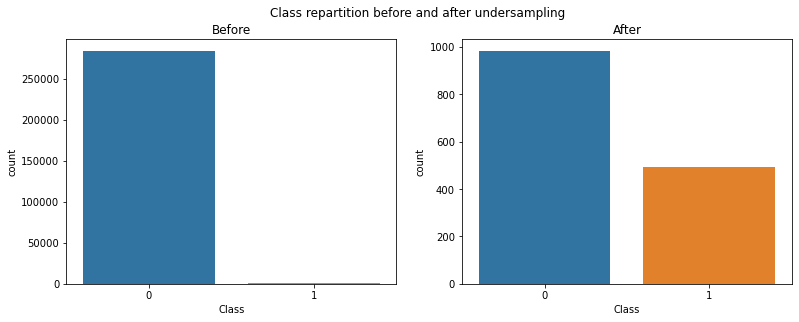

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

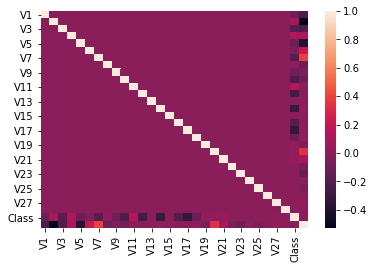

In [17]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()

sns.heatmap(corrmat)
plt.show()

In [18]:
# Putting feature variable to X
X = df.drop('Class',axis=1)

# Putting response variable to y
y = df['Class']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## SVM

In [19]:
#implementation of th SVM model for our training data
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [20]:
# Making predictions
predictions = svm_model.predict(X_test)

In [21]:
confusion_matrix(y_test, predictions)

array([[85304,     4],
       [   47,    88]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test,predictions)))

Accuracy 99.94 %


In [23]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,predictions))
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test,predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.96      0.65      0.78       135

    accuracy                           1.00     85443
   macro avg       0.98      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy 99.94 %


## Logistic Regression

In [24]:
#Implementation of the logistic regression model for the training data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [25]:
#Implementation of the logistic regression model for the testing data
y_test_pred = logistic_model.predict(X_test)  
confusion_matrix(y_test, y_test_pred)

array([[85292,    16],
       [   57,    78]], dtype=int64)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_test_pred))
print("Accuracy {:.2f} %".format( 100 * accuracy_score(y_test,y_test_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.91      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy 99.91 %


# Comparision between diffrent Sampling techniques

# Under Sampling

In [27]:
from collections import Counter
Counter(y_train)

Counter({0: 199007, 1: 357})

In [28]:

from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\anaconda\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199007, 1: 357})
The number of classes after fit Counter({0: 446, 1: 357})


In [29]:

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [30]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5312 79996]
 [    2   133]]
0.06372669498964222
              precision    recall  f1-score   support

           0       1.00      0.06      0.12     85308
           1       0.00      0.99      0.00       135

    accuracy                           0.06     85443
   macro avg       0.50      0.52      0.06     85443
weighted avg       1.00      0.06      0.12     85443



# Over Sampling

In [31]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [32]:
from imblearn.over_sampling import RandomOverSampler
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\anaconda\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199007, 1: 357})
The number of classes after fit Counter({0: 199007, 1: 149255})


In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85299     9]
 [   30   105]]
0.9995435553526912
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.92      0.78      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



# SMOTE 

In [35]:
from imblearn.combine import SMOTETomek

In [36]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

D:\anaconda\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


The number of classes before fit Counter({0: 199007, 1: 357})
The number of classes after fit Counter({0: 199007, 1: 149255})


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [38]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[85288    20]
 [   26   109]]
0.9994616293903538
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.81      0.83       135

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

